In [13]:
from library_dicom.dicom_processor.model.csv_reader.CsvReader import CsvReader
from library_dicom.dicom_processor.model.csv_reader.RoiFactory import RoiFactory
import matplotlib.pyplot as plt

In [14]:
import numpy as np

In [2]:
csv_reader = CsvReader(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010.csv')


In [3]:
manual_rois = csv_reader.get_manual_rois()
print(len(manual_rois))
automatic_rois = csv_reader.get_nifti_rois()
print(len(automatic_rois))

4
0


{'name': '31 - Urinary system', 'first_slice': 85, 'last_slice': 134, 'type_number': 1, 'point_list': [[111, 68], [103, 58], [82, 57], [69, 69], [73, 94], [88, 109], [101, 106], [106, 97], [109, 79]]}
(256, 256, 512)


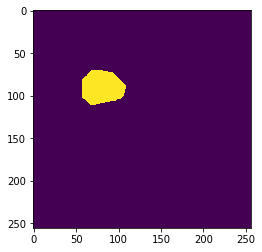

{'name': 'Urinary system', 'first_slice': 98, 'last_slice': 141, 'type_number': 1, 'point_list': [[73, 99], [72, 83], [71, 74], [55, 67], [42, 73], [42, 93], [47, 110], [63, 113]]}
(256, 256, 512)


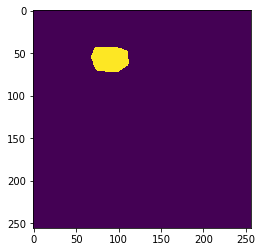

{'name': '6 - Mediastinal', 'first_slice': 143, 'last_slice': 171, 'type_number': 11, 'point_list': [[87, 86], [101, 86], [87, 72]]}
(256, 256, 512)


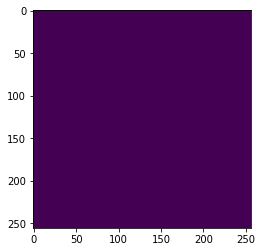

{'name': 'Mediastinal', 'first_slice': 154, 'last_slice': 172, 'type_number': 11, 'point_list': [[95, 72], [104, 72], [95, 63]]}
(256, 256, 512)


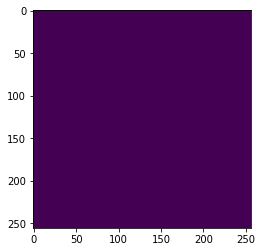

In [4]:
for manual_roi in manual_rois:
    roi_object = csv_reader.convert_manual_row_to_object(manual_roi)
    print(roi_object)
    roi_factory1 = RoiFactory(roi_object, (256,256,512), 100)
    roi1 = roi_factory1.read_roi()
    mask1 = roi1.calculateMaskPoint()
    print(mask1.shape)
    plt.imshow(mask1[:, :, 120])
    plt.show()

In [15]:
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

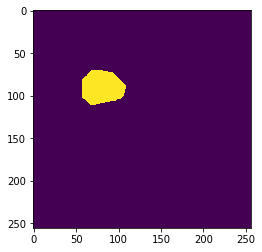

In [19]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010.csv', [256, 256, 700])
mask_csv = mask_build.read_csv()
plt.imshow(mask_csv[:,:,100, 0])

(256, 256, 700)


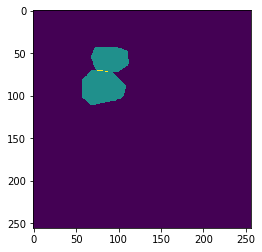

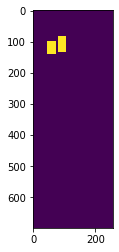

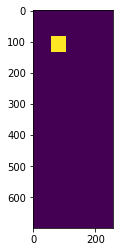

In [7]:
mask_csv = mask_build.read_csv()
somme = 0
for i in range(4) : 
    somme += mask_csv[:,:,:,i]
print(somme.shape)

plt.imshow(somme[:,:,100])
plt.show()


coronal = np.transpose(somme, (2,0,1))
plt.imshow(coronal[:,:,100])
plt.show()

sagittal = np.transpose(somme, (2,1,0))
plt.imshow(sagittal[:,:,100])
plt.show()

In [16]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010_saggital.csv', [256, 256, 700])
print(mask_build)

In [17]:
mask = mask_build.read_csv()
plt.imshow(mask[:,:,75,0])


ValueError: could not broadcast input array from shape (256,700,256) into shape (256,256,700)